In [1]:
import numpy as np
import scipy.signal
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("./dataset/elecfeatures/beatsdataset.csv")
data = data.loc[:, '1-ZCRm':'class']

In [3]:
label = data.loc[:, 'class']
# to do: iterate the label to find out how many kinds of labels we have

X = data.loc[:, '1-ZCRm':'71-BPMessentia']
print(type(label))
print(X.columns)

<class 'pandas.core.series.Series'>
Index(['1-ZCRm', '2-Energym', '3-EnergyEntropym', '4-SpectralCentroidm',
       '5-SpectralSpreadm', '6-SpectralEntropym', '7-SpectralFluxm',
       '8-SpectralRolloffm', '9-MFCCs1m', '10-MFCCs2m', '11-MFCCs3m',
       '12-MFCCs4m', '13-MFCCs5m', '14-MFCCs6m', '15-MFCCs7m', '16-MFCCs8m',
       '17-MFCCs9m', '18-MFCCs10m', '19-MFCCs11m', '20-MFCCs12m',
       '21-MFCCs13m', '22-ChromaVector1m', '23-ChromaVector2m',
       '24-ChromaVector3m', '25-ChromaVector4m', '26-ChromaVector5m',
       '27-ChromaVector6m', '28-ChromaVector7m', '29-ChromaVector8m',
       '30-ChromaVector9m', '31-ChromaVector10m', '32-ChromaVector11m',
       '33-ChromaVector12m', '34-ChromaDeviationm', '35-ZCRstd',
       '36-Energystd', '37-EnergyEntropystd', '38-SpectralCentroidstd',
       '39-SpectralSpreadstd', '40-SpectralEntropystd', '41-SpectralFluxstd',
       '42-SpectralRolloffstd', '43-MFCCs1std', '44-MFCCs2std', '45-MFCCs3std',
       '46-MFCCs4std', '47-MFCCs5std',

In [4]:
def extractLabelInfo(label):
    """
    Find out how many labels types, and return the label value to a list
    """
    label_v = []
    num = 0
    for i, value in label.iteritems():
        curr_label = value
        if curr_label in label_v:
            continue
        else:
            label_v.append(value)
            num += 1
        
    return num, label_v

In [11]:
def plotLDA(X, label):
    lda = LDA(n_components=2) #2-dimensional LDA
    lda_transformed = pd.DataFrame(lda.fit_transform(X, label))
    
    n, v = extractLabelInfo(label)
    color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
    for i in range(n):
        label_i = v[i]
        plt.scatter(lda_transformed[label == label_i][0],lda_transformed[label == label_i][1], label='Class '+ label_i, c=next(color))


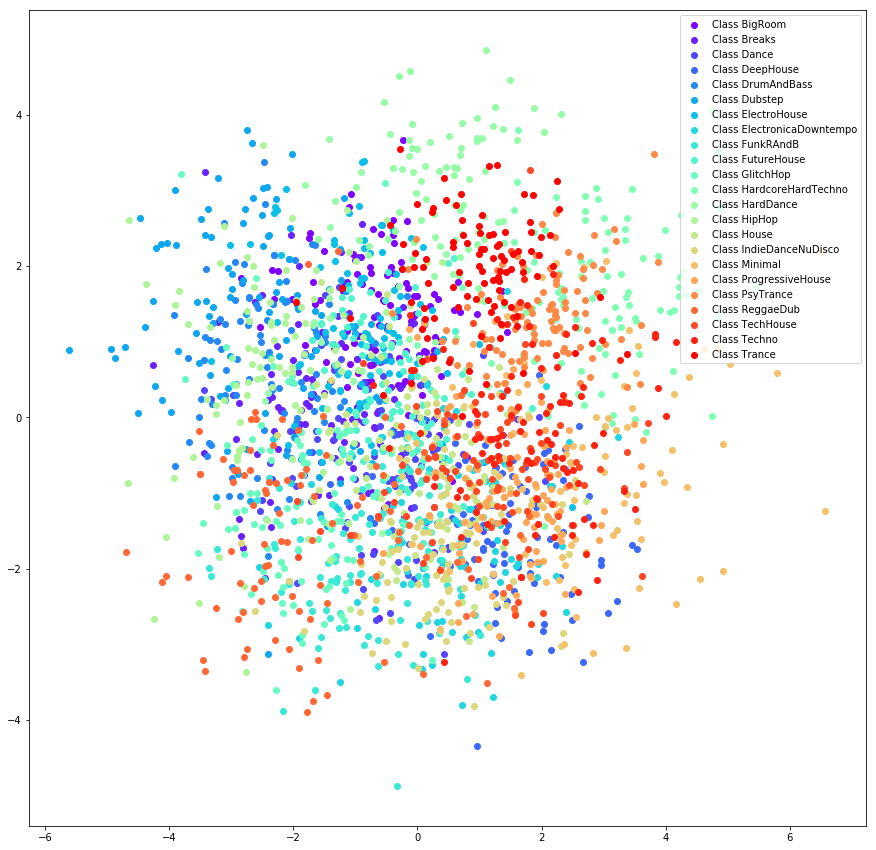

In [15]:
plt.figure(figsize=(15,15))
plotLDA(X, label)
plt.legend(loc = 1)

In [9]:
def plotPCA(X, label):
    pca = sklearnPCA(n_components=2)
    pca_transformed = pd.DataFrame(pca.fit_transform(X))
    
    n, v = extractLabelInfo(label)
    color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
    for i in range(n):
        label_i = v[i]
        plt.scatter(pca_transformed[label == label_i][0],pca_transformed[label == label_i][1], label='Class '+ label_i, c=next(color))
    

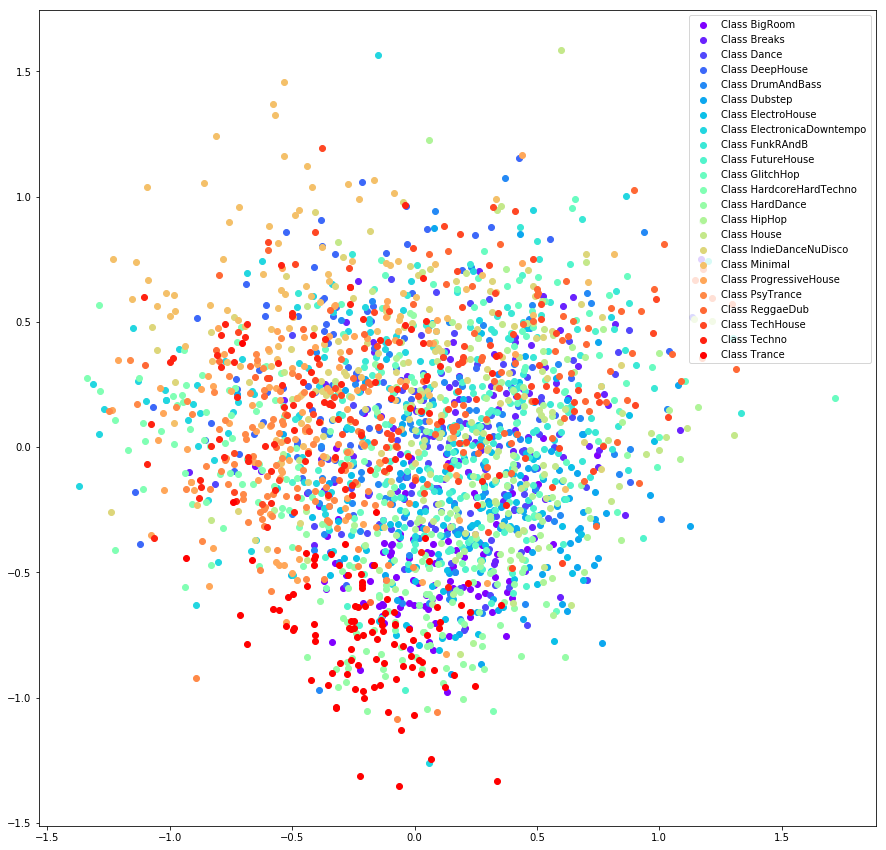

In [14]:
plt.figure(figsize=(15,15))
X_norm = (X - X.min())/(X.max()-X.min())
plotPCA(X_norm, label)
plt.legend(loc = 1)